In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [68]:
X, y = make_blobs(n_samples=120, centers=3, n_features=2, random_state=2)
print(f"Shape of X: {X.shape}")

X = StandardScaler().fit_transform(X)

Shape of X: (120, 2)


In [64]:
def euclidean(point, data):
    """
    Return euclidean distances between a point & a dataset
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))



In [72]:
class KMeans:
    # TODO: Document code
    def __init__(self, k, max_iter = 100):
        self.k = k
        self.max_iter = max_iter
    
    def initialize_centroids(self, X):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        centroids = [X[np.random.choice(len(X))]]
        
        for _ in range(self.k-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X) for centroid in centroids], axis=0)
            
            # Normalize the distances    
            dists /= np.sum(dists)
            
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X)), size=1, p=dists)[0]  # Indexed @ zero to get val, not array of val
            centroids.append(X[new_centroid_idx])
        
        return centroids
    
    
    def fit(self, X):
        
        self.centroids = self.initialize_centroids(X)
        
        for iter in range(self.max_iter):
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.k)]
            
            for x in X:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)            
            
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
    
    
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs
        
        

In [73]:
kmeans = KMeans(3)
kmeans.fit(X)

In [74]:
class_centers, classification = kmeans.evaluate(X)

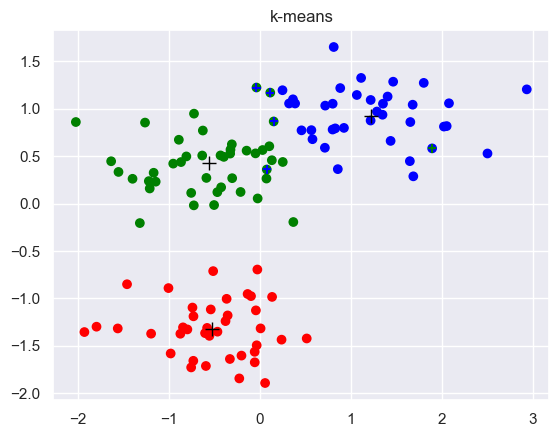

In [99]:
colors = {0: 'red', 1: 'blue', 2: 'green'}

plt.scatter(X[:, 0],  X[:, 1], c=[colors[color] for color in classification])
plt.scatter(X[:, 0],  X[:, 1], c=[colors[color] for color in y], marker='+')
plt.plot([x for x, _ in kmeans.centroids], [y for _, y in kmeans.centroids], '+', markersize=10, c='black')
plt.title("k-means")
plt.show()

In [105]:
sum(classification == y)/len(classification)

0.9583333333333334